<a href="https://colab.research.google.com/github/shan-david/hacking-civico/blob/master/proyecto/Proyecto_hacking_civico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
```

# **Accidentes viales en el municipio de Puebla**

En días recientes, el ayuntamiento de Puebla inició el retiro de puentes peatonales para sustiturlos por otro tipo de infraestructura más accesible para los peatones. 

Sin embargo, esto podría no ser suficiente dado el alto número de accidentes viales en los que son los peatones los que se ven afectados, los cuales se dan en vialidades princiales de la ciudad pese a que se tienen límites de velocidad estableciso.


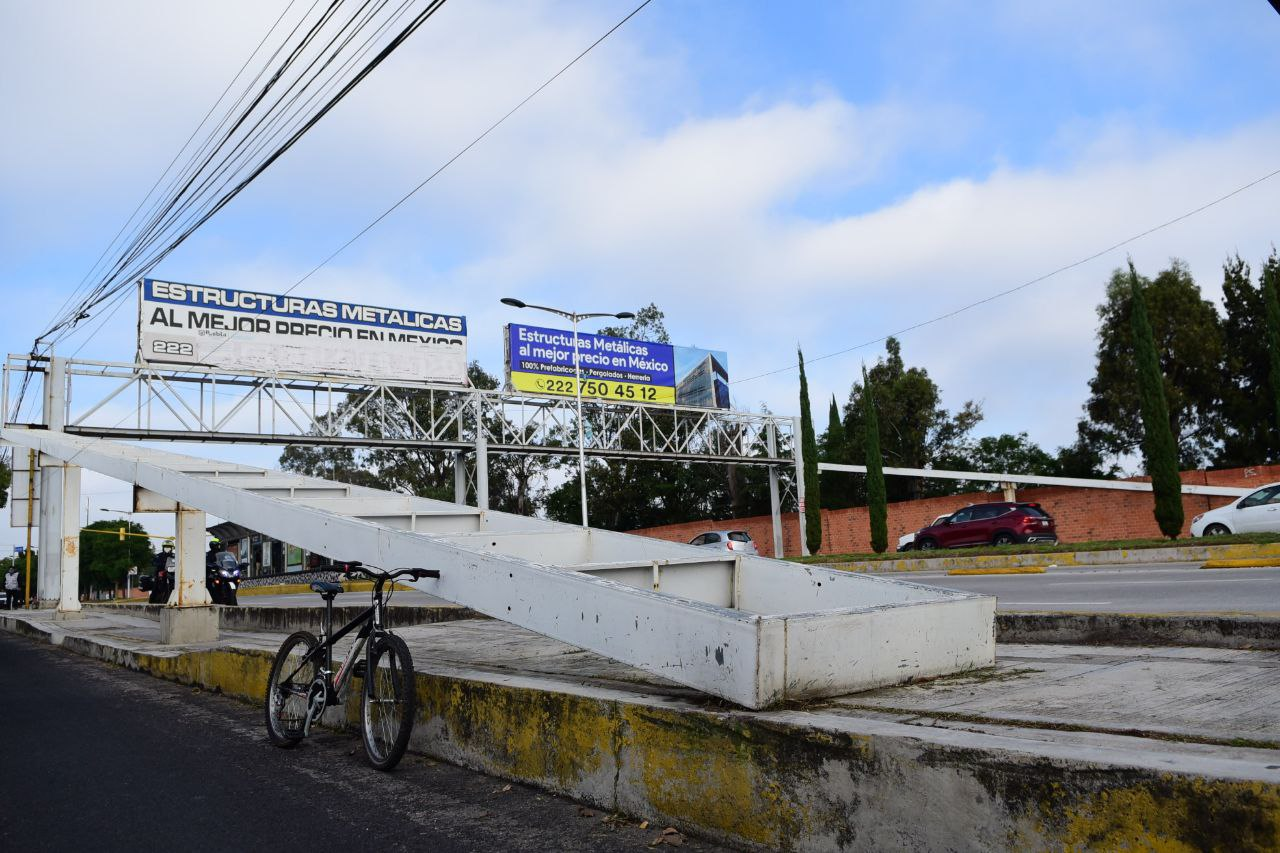
Foto: Twitter @PueblaAyto

***Los datos***

Para el presente proyecto se tomaron bases de datos publicadas por el ayuntamiento de Puebla en [el portal de datos abiertos](https://datos.pueblacapital.gob.mx/).

Se tomaron los datos correspondientes al número de incidentes viales de 2020, así como el reporte de límites de velocidad en vialidades de la capital.

En el caso de los reportes de incidentes viales, estos se publican de manera mensual, por lo que antes de importarlos los integré en un solo archivo.

In [73]:
import statistics

import pandas as pd
import numpy as np

In [74]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [75]:
accidentes = '/content/drive/My Drive/Datos Abiertos/Accidentes2020.xlsx'
velocidad = '/content/drive/My Drive/Datos Abiertos/Proyecto Hacking/velocidadpermitida.csv'

In [76]:
data_accidentes = pd.read_excel(accidentes, encoding='latin-1')
data_velocidad = pd.read_csv(velocidad, encoding='latin-1')

In [77]:
data_accidentes.columns = data_accidentes.columns.str.replace(' ', '_')

In [78]:
data_velocidad.columns = data_velocidad.columns.str.replace(' ', '_')

In [79]:
data_accidentes.head()

Fecha      Hora    Servicio  ... Peatones_Muertos Tipo_Enervante Autoridad
0 2020-01-01  03:10:00  Particular  ...                0              0         0
1 2020-01-01  09:30:00  Particular  ...                0              0         0
2 2020-01-01  10:45:00  Particular  ...                0              0         0
3 2020-01-01  16:00:00  Particular  ...                0              0         0
4 2020-01-01  17:40:00  Particular  ...                0              0         0

[5 rows x 15 columns]

In [80]:
data_velocidad.head()

ï»¿FID  ... Velocidad_Permitida_
0    6054  ...                   50
1    6055  ...                   60
2    6056  ...                   60
3    6057  ...                   60
4    6058  ...                  110

[5 rows x 4 columns]

In [81]:
def cast_datetime_cols(df):
    timestamp_cols = [col for col in df.columns if "Fecha" in col]
    df[timestamp_cols] = df[timestamp_cols].apply(lambda date_col: pd.to_datetime(date_col, errors="coerce"), axis=0)
    return df

data_accidentes = cast_datetime_cols(data_accidentes)

In [82]:
data_accidentes['mes'] = data_accidentes.Fecha.dt.month
data_accidentes['año'] = data_accidentes.Fecha.dt.year

In [83]:
numerical = data_accidentes.select_dtypes(include='number')
categorical = data_accidentes.select_dtypes(include=['object', 'bool', 'category', 'datetime64[ns]'])

In [84]:
for col in categorical.drop(columns='Fecha').columns:
  print('Valor más popular en "{}": {}'.format(col, statistics.mode(categorical[col])))

Valor más popular en "Hora": 16:00:00
Valor más popular en "Servicio": Particular
Valor más popular en "Tipo": Choque
Valor más popular en "Calle_1": Cinco de mayo blvr.
Valor más popular en "Calle_2": Sin datos
Valor más popular en "Colonia": Col. Centro historico
Valor más popular en "Tipo_Enervante": 0
Valor más popular en "Autoridad": 0


**Exploración de datos**

Para identificar algunos de los datos principales, se usaron diversas funciones

In [ ]:
# ¿Cuáles son las calles con más accidentes en Puebla?
data_accidentes.Calle_1.value_counts()

Cinco de mayo blvr.       61
Norte blvr.               58
16 de septiembre prol.    53
11 sur                    50
Dieciocho de noviembre    41
                          ..
Ciudad militar.            1
Neptuno                    1
50 norte                   1
Margarita priv.            1
Calle h.                   1
Name: Calle_1, Length: 459, dtype: int64

In [ ]:
data_accidentes.Calle_2.value_counts()

Sin datos                 301
16 de septiembre prol.     24
Serdan carmen              24
9 sur                      16
Valsequillo blvr.          15
                         ... 
Tulipanes                   1
42 norte priv.              1
14 b sur                    1
39 sur                      1
Moctezuma                   1
Name: Calle_2, Length: 620, dtype: int64

In [ ]:
# ¿Cuáles son los accidentes más comunes?
data_accidentes.Tipo.value_counts()

Choque              1742
Atropellamiento       78
Volcadura             38
Caida de persona      16
Antecedente            2
Name: Tipo, dtype: int64

In [ ]:
# ¿Cuáles son los límites de velocidad en la ciudad de Puebla?
data_velocidad.Velocidad_Permitida_.value_counts()

60     2599
40      891
50      735
30      265
70      173
45       82
20       65
110      49
10       45
25       14
Name: Velocidad_Permitida_, dtype: int64

In [ ]:
# ¿Cuántos peatones han resultado heridos?
data_accidentes.Peatones_Heridos.value_counts()

0    1811
1      62
2       3
Name: Peatones_Heridos, dtype: int64

In [ ]:
# ¿Cuántos peatones han muerto?
data_accidentes.Peatones_Muertos.value_counts()

0    1865
1      11
Name: Peatones_Muertos, dtype: int64

In [158]:
# ¿Cuántos accidentes por mes se han dado?
data_accidentes.groupby(['mes']).count()

Fecha  Hora  Servicio  ...  Tipo_Enervante  Autoridad  año
mes                         ...                                
1      357   357       357  ...             357        357  357
2      378   378       378  ...             378        378  378
3      301   301       301  ...             301        301  301
4      190   190       190  ...             190        190  190
5      185   185       185  ...             185        185  185
6      197   197       197  ...             197        197  197
7      268   268       268  ...             268        268  268

[7 rows x 16 columns]

In [159]:
# Desglose de accidentes por mes y tipo
data_accidentes.groupby(['mes', 'Tipo']).count()

Fecha  Hora  Servicio  ...  Tipo_Enervante  Autoridad  año
mes Tipo                                     ...                                
1   Atropellamiento      22    22        22  ...              22         22   22
    Caida de persona      1     1         1  ...               1          1    1
    Choque              329   329       329  ...             329        329  329
    Volcadura             5     5         5  ...               5          5    5
2   Atropellamiento      15    15        15  ...              15         15   15
    Caida de persona      7     7         7  ...               7          7    7
    Choque              347   347       347  ...             347        347  347
    Volcadura             9     9         9  ...               9          9    9
3   Antecedente           1     1         1  ...               1          1    1
    Atropellamiento      11    11        11  ...              11         11   11
    Caida de persona      3     3         3  ...               3          3    3
    Choque              278   278       278  ...             278        278  278
    Volcadura             8     8         8  ...               8          8    8
4   Atropellamiento       4     4         4  ...               4          4    4
    Choque              181   181       181  ...             181        181  181
    Volcadura             5     5         5  ...               5          5    5
5   Atropellamiento       8     8         8  ...               8          8    8
    Choque              174   174       174  ...             174        174  174
    Volcadura             3     3         3  ...               3          3    3
6   Atropellamiento       7     7         7  ...               7          7    7
    Caida de persona      2     2         2  ...               2          2    2
    Choque              186   186       186  ...             186        186  186
    Volcadura             2     2         2  ...               2          2    2
7   Antecedente           1     1         1  ...               1          1    1
    Atropellamiento      11    11        11  ...              11         11   11
    Caida de persona      3     3         3  ...               3          3    3
    Choque              247   247       247  ...             247        247  247
    Volcadura             6     6         6  ...               6          6    6

[28 rows x 15 columns]

In [ ]:
import altair as alt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [88]:
from datetime import datetime

In [ ]:
accidentes = data_accidentes
velocidad = data_velocidad

In [137]:
data_accidentes['Fecha']=data_accidentes['Fecha'].astype(str)

In [139]:
data_accidentes['Hora']=data_accidentes['Hora'].astype(str)

In [ ]:

alt.Chart(velocidad).mark_line().encode(
    x = "Nombre_",
    y = "Velocidad_Permitida_",
)

alt.Chart(...)

In [138]:
data_accidentes.head()

Fecha      Hora    Servicio  ... Autoridad mes   año
0  2020-01-01  03:10:00  Particular  ...         0   1  2020
1  2020-01-01  09:30:00  Particular  ...         0   1  2020
2  2020-01-01  10:45:00  Particular  ...         0   1  2020
3  2020-01-01  16:00:00  Particular  ...         0   1  2020
4  2020-01-01  17:40:00  Particular  ...         0   1  2020

[5 rows x 17 columns]

In [142]:
alt.Chart(data_accidentes).mark_bar().encode(
    x = alt.X("Calle_1:N"),
    y = "count()"
)

alt.Chart(...)

In [144]:
alt.Chart(data_accidentes).mark_bar().encode(
    x = alt.X("Calle_1:N"),
    y = alt.Y("Peatones_Heridos:Q")
).properties(
    title = "Peatones Heridos por vialidad"
)

alt.Chart(...)

In [145]:
alt.Chart(data_accidentes).mark_bar().encode(
    x = alt.X("Calle_1:N"),
    y = alt.Y("Peatones_Muertos:Q")
).properties(
    title = "Peatones Muertos por vialidad"
)

alt.Chart(...)

In [156]:
alt.Chart(data_accidentes).mark_bar().encode(
    x = alt.X("mean(Peatones_Heridos):Q"),
    y = alt.Y("Servicio:N")
)

alt.Chart(...)

# Conclusiones

De los datos analizados se encontró que:
Las calles con más accidentes son el Bulevard 5 de Mayo, el Bulevard Norte, la prolongación de la 16 de Septiembre, la 11 Sur y la calle 18 de Novimebre, las cuales son avenidas principales de la ciudad.

Sin embargo, las lesiones a petaones se concentraron en otras avenidas, pues de acuerdo con las gráficas generadas, el Bulevard Los Pilares, la avenida de Las Torres y el Bulevard Xonaca tienen el mayor número de registros.

La mayoría de las calles de la ciudad tienen una velocidad promedio de 60 kilómetros por hora.

En el año se han registrado 1,742 choques y 78 atropellamientos

En estos accidentes han resultado lesionados 68 personas y han muerto 11.

Además, llama la atención que principalmente los accidentes en los que se lesionan a peatones están involucradas unidades del transporte público.

Un aspecto que llama la atención es que en el período de marzo a junio se redujeron los accidentes, esto debido a que en estos meses fue inició la contingencia por COVID-19 lo cual redujo la afluencia de  personas en la vía pública.

Es decir, la decisión de quitar los puentes peatonales tiene que ir de la mano con una estrategia para la protección de los ciudadanos, pues pese a los límites de velocidad establecidos, los accidentes son constantes.


*Fuentes*

Portal de Datos Abiertos Ayuntamiento de Puebla.
Velocidad permitida
http://datos.pueblacapital.gob.mx/dataset/velocidad-permitida

Portal de Datos Abiertos Ayuntamiento de Puebla. Hechos de tránsito
http://datos.pueblacapital.gob.mx/dataset/hechos-de-tr%C3%A1nsito
